In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [6]:
def print_null_percent(data):
    null_data = data.isna().sum() / len(data)
    return null_data.apply(lambda x: f'{x:.1%}')


print_null_percent(df)

species              0.0%
island               0.0%
culmen_length_mm     0.6%
culmen_depth_mm      0.6%
flipper_length_mm    0.6%
body_mass_g          0.6%
sex                  2.9%
dtype: object

In [7]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [8]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [9]:
df.drop(336)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['sex'])
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,3
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,3
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,1


In [12]:
df.drop('sex', axis=1, inplace=True)

In [13]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,3
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,3
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


**Fill empty data with SimpleImputer**

In [14]:
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:, :] = imputer.fit_transform(df)

In [15]:
def print_percent_and_count_null(data):
    data_null = data.isna().sum()
    percent_null = data.isna().sum() / len(data)
    percent_null = percent_null.apply(lambda x: f"{x:.1%}")
    result = pd.concat([data_null, percent_null], axis=1)
    result.columns = ['Null Count', 'Null Percentage']
    return result
print_percent_and_count_null(df)

,Null Count,Null Percentage
species,0,0.0%
island,0,0.0%
culmen_length_mm,0,0.0%
culmen_depth_mm,0,0.0%
flipper_length_mm,0,0.0%
body_mass_g,0,0.0%
gender,0,0.0%


In [16]:
species_counting = df['species'].value_counts().reset_index()

In [17]:
species_counting

,species,count
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


<Axes: xlabel='species', ylabel='count'>

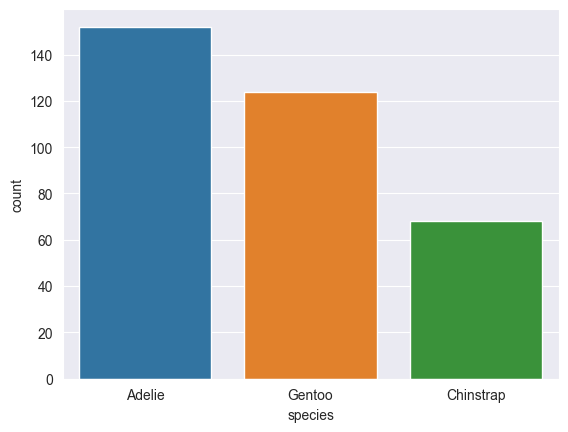

In [18]:
sns.barplot(data=species_counting, x='species', y='count')

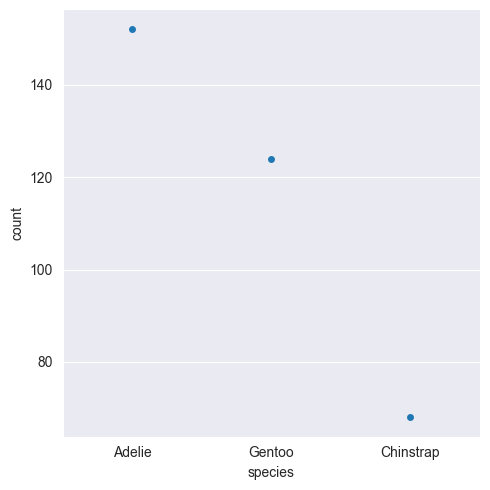

In [19]:
sns.catplot(data=species_counting, x='species', y='count')

In [20]:
island = pd.get_dummies(df[['island']], drop_first=True)

In [21]:
df2 = pd.concat([df, island], axis=1)

In [22]:
df2.drop('island', axis=1, inplace=True)

In [23]:
df2

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,2,False,True
1,Adelie,39.5,17.4,186.0,3800.0,1,False,True
2,Adelie,40.3,18.0,195.0,3250.0,1,False,True
3,Adelie,41.1,17.0,190.0,3800.0,3,False,True
4,Adelie,36.7,19.3,193.0,3450.0,1,False,True
...,...,...,...,...,...,...,...,...
339,Gentoo,41.1,17.0,190.0,3800.0,3,False,False
340,Gentoo,46.8,14.3,215.0,4850.0,1,False,False
341,Gentoo,50.4,15.7,222.0,5750.0,2,False,False
342,Gentoo,45.2,14.8,212.0,5200.0,1,False,False


In [24]:
target_ = df.species
features_ = df.drop('species', axis=1)

In [25]:
features_.drop('island', axis=1, inplace=True)

In [26]:
features_

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,39.1,18.7,181.0,3750.0,2
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
3,41.1,17.0,190.0,3800.0,3
4,36.7,19.3,193.0,3450.0,1
...,...,...,...,...,...
339,41.1,17.0,190.0,3800.0,3
340,46.8,14.3,215.0,4850.0,1
341,50.4,15.7,222.0,5750.0,2
342,45.2,14.8,212.0,5200.0,1


In [27]:
sc = StandardScaler()
sc.fit(features_.iloc[:,:4])
sc.transform(features_.iloc[:, :4])

array([[-0.88337514,  0.78817606, -1.41547062, -0.56245242],
       [-0.80984515,  0.12700117, -1.05896022, -0.49987686],
       [-0.66278518,  0.43215881, -0.41724152, -1.18820802],
       ...,
       [ 1.19384695, -0.73761215,  1.50791459,  1.94056999],
       [ 0.23795714, -1.19534861,  0.79489381,  1.25223883],
       [ 1.10193447, -0.53417372,  0.86619589,  1.50254107]])

In [28]:
target_

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [29]:
target_encoded = le.fit_transform(target_)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(features_, target_encoded)

In [31]:
x_train.shape

(258, 5)

In [32]:
x_test.shape

(86, 5)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [34]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [35]:
predicted = tree.predict(x_test)

Text(50.722222222222214, 0.5, 'y_true')

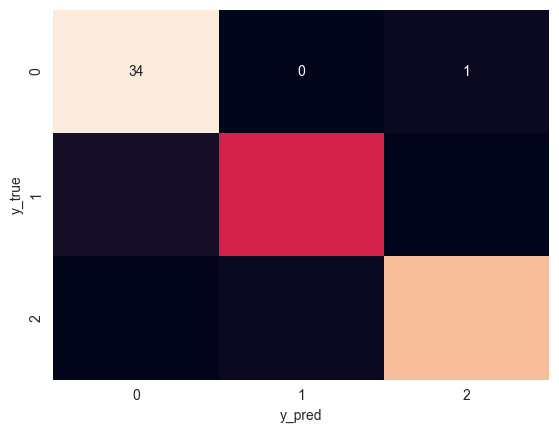

In [36]:
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, cbar=False)
plt.xlabel('y_pred')
plt.ylabel('y_true')

In [37]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        35
           1       0.95      0.90      0.92        20
           2       0.97      0.97      0.97        31

    accuracy                           0.95        86
   macro avg       0.95      0.95      0.95        86
weighted avg       0.95      0.95      0.95        86


In [38]:
tree.score(x_test, y_test)

0.9534883720930233

In [39]:
accuracy_score(y_test, predicted)

0.9534883720930233

In [40]:
final_df = pd.concat([features_, pd.Series(target_encoded, name="Target")], axis=1)

In [41]:
final_df.to_csv('final_penguins_df.csv', index=False,encoding='utf-8')